In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [4]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [6]:
df.shape

(212331, 15)

In [7]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

Findings: several columns have a data type of object, but they should be numeric for proper analysis;
the Regent Exam column contains 212,321 entries, which is 10 fewer than the total number of records (212,331)

In [9]:
#convert datatype to appropriate
columns_to_convert = ['Mean Score', 'Number Scoring Below 65',
                      'Percent Scoring Below 65',
                      'Number Scoring 80 or Above',
                      'Percent Scoring 80 or Above',
                      'Number Scoring CR',
                      'Percent Scoring CR']
for col in columns_to_convert:

    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)

School DBN                      object
School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65        float64
Percent Scoring Below 65       float64
Number Scoring 65 or Above      object
Percent Scoring 65 or Above     object
Number Scoring 80 or Above     float64
Percent Scoring 80 or Above    float64
Number Scoring CR              float64
Percent Scoring CR             float64
dtype: object


In [10]:
#save modyfied dataset
cleaned_df = df
cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [11]:
cleaned_df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
53439,84X202,New Visions Charter High School for Advanced Math,High school,Algebra2/Trigonometry,2015,4,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
143761,02M400,High School for Environmental Studies,High school,U.S. History and Government,2017,16,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
155318,07X221,South Bronx Preparatory: A College Board School,Secondary School,Geometry,2015,2,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
88133,24Q236,International High School for Health Sciences,High school,Geometry,2016,1,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
70001,10X213,Bronx Engineering and Technology Academy,High school,Common Core Geometry,2015,4,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
175465,15K443,New Voices School of Academic & Creative Arts,Junior High-Intermediate-Middle,Living Environment,2017,6,88.2,0.0,0.0,6,100,6.0,100.0,NaN,NaN
60094,02M630,Art and Design High School,High school,Physical Settings/Physics,2015,1,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
61356,03M859,Special Music School,K-12 all grades,Living Environment,2017,28,75.4,5.0,17.9,23,82.1,12.0,42.9,NaN,NaN
167775,11X370,Leaders of Tomorrow,Junior High-Intermediate-Middle,Common Core Algebra,2017,1,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
193105,25Q525,Townsend Harris High School,High school,Geometry,2015,160,94.1,0.0,0.0,160,100,159.0,99.4,159.0,99.4


In [12]:
#check missing values
cleaned_df.isnull().sum()

,0
School DBN,0
School Name,0
School Level,0
Regents Exam,10
Year,0
Total Tested,0
Mean Score,75222
Number Scoring Below 65,75222
Percent Scoring Below 65,75222
Number Scoring 65 or Above,0


In [13]:
#show missing values data in the regents exam column

print(cleaned_df['Regents Exam'].isnull().sum())
(cleaned_df[cleaned_df['Regents Exam'].isnull()])

10


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61.0,67.8,29,32.2,6.0,6.7,0.0,0.0
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55.0,67.9,26,32.1,5.0,6.2,0.0,0.0
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6.0,66.7,3,33.3,1.0,11.1,0.0,0.0
100865,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,5,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34.0,63.0,20,37,6.0,11.1,0.0,0.0
100867,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,31,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34.0,63.0,20,37,5.0,9.3,0.0,0.0
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27.0,75.0,9,25,1.0,2.8,0.0,0.0
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59.0,9.0,75.0,3,25,1.0,8.3,0.0,0.0
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52.0,66.7,26,33.3,5.0,6.4,0.0,0.0


In [14]:
#drop Number Scoring CR and Percent Scoring CR column where data is NaN and save new clean data frame as cleaned_df

cleaned_df = cleaned_df.dropna(subset=['Number Scoring CR', 'Percent Scoring CR'])
print(cleaned_df.isnull().sum())

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   8
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64


In [15]:
# Display rows where 'Regents Exam' is missing
(cleaned_df[cleaned_df['Regents Exam'].isnull()])

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61.0,67.8,29,32.2,6.0,6.7,0.0,0.0
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55.0,67.9,26,32.1,5.0,6.2,0.0,0.0
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6.0,66.7,3,33.3,1.0,11.1,0.0,0.0
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34.0,63.0,20,37,6.0,11.1,0.0,0.0
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34.0,63.0,20,37,5.0,9.3,0.0,0.0
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27.0,75.0,9,25,1.0,2.8,0.0,0.0
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59.0,9.0,75.0,3,25,1.0,8.3,0.0,0.0
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52.0,66.7,26,33.3,5.0,6.4,0.0,0.0


Findings: Dataset doesn't contain subject names for Inwood Academy for Leadership Charter School in 2015 year.

In [30]:
#create separate column for Borough
cleaned_df['Borough'] = cleaned_df['School DBN'].str[2]
cleaned_df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
18717,84M522,Broome Street Academy Charter School,High school,Common Core Algebra2,2017,26,54.5,19.0,73.1,7,26.9,0.0,0.0,7.0,26.9,M
193210,25Q540,Queens Academy High School,High school,Common Core English,2017,7,74.0,1.0,14.3,6,85.7,3.0,42.9,3.0,42.9,Q
127843,23K493,Brooklyn Collegiate: A College Board School,High school,Common Core English,2016,43,68.7,14.0,32.6,29,67.4,9.0,20.9,16.0,37.2,K
49153,30Q502,Information Technology High School,High school,Common Core Algebra,2016,48,63.2,23.0,47.9,25,52.1,6.0,12.5,19.0,39.6,Q
66835,08X405,Herbert H. Lehman High School,High school,Common Core English,2016,181,77.7,25.0,13.8,156,86.2,104.0,57.5,123.0,68.0,X
117240,11X468,Pelham Academy of Academics and Community Enga...,Junior High-Intermediate-Middle,Common Core Algebra,2017,24,80.3,0.0,0.0,24,100,14.0,58.3,24.0,100.0,X
76217,13K419,"Science Skills Center High School for Science,...",High school,Geometry,2016,15,62.1,8.0,53.3,7,46.7,0.0,0.0,0.0,0.0,K
52548,84M350,Democracy Prep Charter School,K-12 all grades,Common Core Algebra,2017,78,82.4,3.0,3.8,75,96.2,57.0,73.1,72.0,92.3,M
133307,29Q265,Excelsior Preparatory High School,High school,Common Core Geometry,2016,19,66.5,8.0,42.1,11,57.9,2.0,10.5,9.0,47.4,Q
85546,21K238,P.S. 238 Anne Sullivan,K-8,Common Core Algebra,2017,18,71.4,3.0,16.7,15,83.3,2.0,11.1,11.0,61.1,K


In [31]:
#convert Borough code to Borough name
borough_dict = {
    'M': 'Manhattan',
    'Q': 'Queens',
    'K': 'Brooklyn',
    'R': 'Staten Island',
    'X': 'Bronx'
}
cleaned_df['Borough'] = cleaned_df['Borough'].map(borough_dict)
cleaned_df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
84683,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,89,88.6,0.0,0.0,89,100,80.0,89.9,89.0,100.0,Brooklyn
23336,02M580,Richard R. Green High School of Teaching,High school,Geometry,2015,24,41.2,24.0,100.0,0,0,0.0,0.0,0.0,0.0,Manhattan
158384,08X367,"Archimedes Academy for Math, Science and Techn...",Secondary School,English,2015,34,64.0,17.0,50.0,17,50,6.0,17.6,9.0,26.5,Bronx
2232,02M615,Chelsea Career and Technical Education High Sc...,High school,Algebra2/Trigonometry,2017,11,51.5,8.0,72.7,3,27.3,1.0,9.1,1.0,9.1,Manhattan
21774,02M425,Leadership and Public Service High School,High school,Common Core Algebra,2017,176,67.4,53.0,30.1,123,69.9,18.0,10.2,90.0,51.1,Manhattan
24279,03M485,Fiorello H. LaGuardia High School of Music & A...,High school,Common Core Algebra,2016,9,85.4,0.0,0.0,9,100,7.0,77.8,9.0,100.0,Manhattan
39385,18K567,Brooklyn Theatre Arts High School,High school,Common Core English,2017,22,49.0,17.0,77.3,5,22.7,0.0,0.0,2.0,9.1,Brooklyn
97082,31R445,Port Richmond High School,High school,English,2015,67,71.4,13.0,19.4,54,80.6,19.0,28.4,35.0,52.2,Staten Island
50046,31R460,Susan E. Wagner High School,High school,English,2016,36,61.7,18.0,50.0,18,50,3.0,8.3,3.0,8.3,Staten Island
80510,17K382,Academy for College Preparation and Career Exp...,Secondary School,Common Core Geometry,2017,9,53.8,8.0,88.9,1,11.1,0.0,0.0,1.0,11.1,Brooklyn


In [32]:
cleaned_df['Borough'].value_counts()

,count
Borough,
Brooklyn,19628
Bronx,17694
Manhattan,16091
Queens,13944
Staten Island,2294


Findings: the numbers reflect the total occurences of schools in the dataset, assuming : 1) each school appears at least 3 times (one per year from 2015-2017); 2) Schools with multiple subjects tested will have multiple entries increasing their count; 3) Brooklyn has highest number of entries indicating a larger number of schools or more subject data available for those schools; 4) Staten Island has lowest number of entries suggesting fewer schools or fewer subjects tested.

In [33]:
#Actual number of unique schools per Borough, descending
unique_schools_per_borough = cleaned_df.groupby('Borough')['School Name'].nunique()
unique_schools_per_borough = unique_schools_per_borough.sort_values(ascending=False)
unique_schools_per_borough

,School Name
Borough,
Brooklyn,299
Bronx,230
Manhattan,210
Queens,170
Staten Island,29


In [35]:
#TOP performing school based on the average "Mean Score"
school_avg_scores = cleaned_df.groupby('School Name')['Mean Score'].mean()
top_school = school_avg_scores.idxmax()
top_score = school_avg_scores.max()
print(f"The top-performing school is {top_school} with an average mean score of {top_score}")






The top-performing school is The Christa McAuliffe School\I.S. 187 with an average mean score of 90.96818181818182


In [36]:
#All results for The Christa McAuliffe School
mcauliffe_schools = cleaned_df[cleaned_df['School Name'].str.contains('The Christa McAuliffe School', na=False)]
mcauliffe_schools

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
12072,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,161,88.8,0.0,0.0,161,100,147.0,91.3,161.0,100.0,Brooklyn
12073,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2016,226,91.3,0.0,0.0,226,100,226.0,100.0,226.0,100.0,Brooklyn
12074,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2017,199,93.3,0.0,0.0,199,100,199.0,100.0,199.0,100.0,Brooklyn
41121,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,161,88.8,0.0,0.0,161,100,147.0,91.3,161.0,100.0,Brooklyn
84683,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,89,88.6,0.0,0.0,89,100,80.0,89.9,89.0,100.0,Brooklyn
84684,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,72,89.0,0.0,0.0,72,100,67.0,93.1,72.0,100.0,Brooklyn
84685,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2016,132,91.2,0.0,0.0,132,100,132.0,100.0,132.0,100.0,Brooklyn
84686,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2016,94,91.3,0.0,0.0,94,100,94.0,100.0,94.0,100.0,Brooklyn
84687,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2017,130,93.0,0.0,0.0,130,100,130.0,100.0,130.0,100.0,Brooklyn
84688,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2017,69,93.9,0.0,0.0,69,100,69.0,100.0,69.0,100.0,Brooklyn


Findings: Top performing school by average mean score is The Christa McAuliffe School\I.S. 187, which is in Brooklyn Borough and subject tested is Common Core Algebra

In [71]:
#Top performing school based on the average "Mean Score" in the Borough of Manhattan, where School Level = Junior High-Intermediate-Middle
manhattan_junior_high = cleaned_df[(cleaned_df['Borough'] == 'Manhattan') & (cleaned_df['School Level'] == 'Junior High-Intermediate-Middle')]
school_avg_scores_manhattan = manhattan_junior_high.groupby('School Name')['Mean Score'].mean()
top_school_manhattan = school_avg_scores_manhattan.idxmax()
top_score_manhattan = school_avg_scores_manhattan.max()
print(f"The top-performing Junior High-Intermediate-Middle school in Manhattan is {top_school_manhattan} with an average mean score of {top_score_manhattan}")



The top-performing Junior High-Intermediate-Middle school in Manhattan is J.H.S. 167 Robert F. Wagner with an average mean score of 90.61304347826086


In [39]:
#All results for J.H.S. 167 Robert F. Wagner school
wagner_schools = cleaned_df[cleaned_df['School Name'].str.contains('J.H.S. 167 Robert F. Wagner', na=False)]
wagner_schools

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
384,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2015,98,86.9,0.0,0.0,98,100,85.0,86.7,98.0,100.0,Manhattan
385,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,98,91.0,0.0,0.0,98,100,97.0,99.0,98.0,100.0,Manhattan
386,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2017,96,93.4,0.0,0.0,96,100,96.0,100.0,96.0,100.0,Manhattan
20156,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,98,91.0,0.0,0.0,98,100,97.0,99.0,98.0,100.0,Manhattan
20157,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2017,96,93.4,0.0,0.0,96,100,96.0,100.0,96.0,100.0,Manhattan
55204,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2015,81,87.1,0.0,0.0,81,100,71.0,87.7,81.0,100.0,Manhattan
55205,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2015,17,85.9,0.0,0.0,17,100,14.0,82.4,17.0,100.0,Manhattan
55206,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,73,91.0,0.0,0.0,73,100,72.0,98.6,73.0,100.0,Manhattan
55207,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,25,91.2,0.0,0.0,25,100,25.0,100.0,25.0,100.0,Manhattan
55208,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2017,66,93.0,0.0,0.0,66,100,66.0,100.0,66.0,100.0,Manhattan


finding: Exam type for both schools - Common Core Algebra; Both schools have 100% pass rate, confirming that both schools are top Performing

Year
2015    88.850000
2016    91.171429
2017    93.185714
Name: Mean Score, dtype: float64


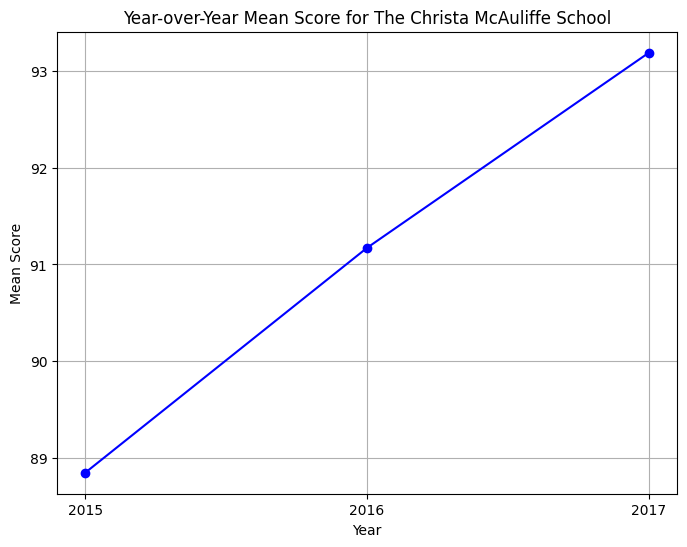

In [43]:
#Analyze the trend of Students Performance year over year by Mean Score from 2015 , 2016, 2017 for the The Christa McAuliffe School\I.S. 187 school

# Filter data for McAuliffe School and relevant years
mcauliffe_data = cleaned_df[
    (cleaned_df['School Name'] == 'The Christa McAuliffe School\I.S. 187') &
    (cleaned_df['Year'] >= 2015) & (cleaned_df['Year'] <= 2017)
]

# Group by year and calculate the mean score
year_over_year_mean = mcauliffe_data.groupby('Year')['Mean Score'].mean()
print(year_over_year_mean)

plt.figure(figsize=(8, 6))
plt.plot(year_over_year_mean.index, year_over_year_mean.values, marker='o', color='blue')
plt.xticks(year_over_year_mean.index)
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Year-over-Year Mean Score for The Christa McAuliffe School')
plt.grid(True)
plt.show()

Year
2015    86.814286
2016    91.037500
2017    93.512500
Name: Mean Score, dtype: float64


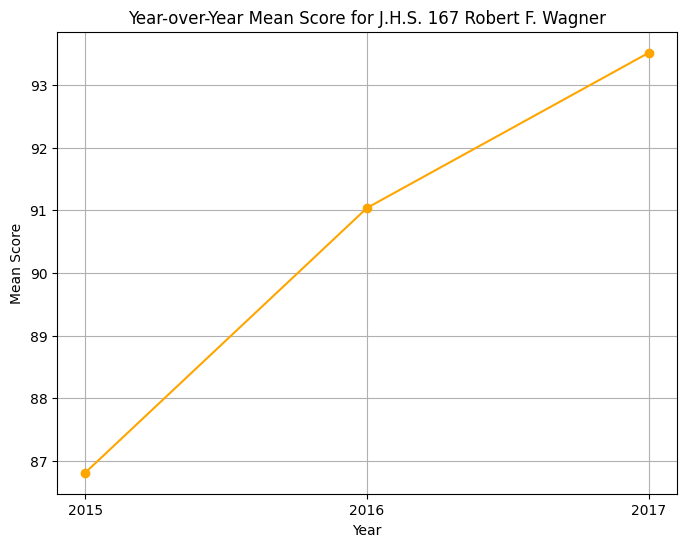

In [44]:
# Analyze year over year trend of students performance by Mean Score from 2015 , 2016, 2017 for the J.H.S. 167 Robert F. Wagner school

# Filter data for Wagner school and relevant years
wagner_data = cleaned_df[
    (cleaned_df['School Name'] == 'J.H.S. 167 Robert F. Wagner') &
    (cleaned_df['Year'] >= 2015) & (cleaned_df['Year'] <= 2017)
]

# Group by year and calculate the mean score
year_over_year_mean = wagner_data.groupby('Year')['Mean Score'].mean()
print(year_over_year_mean)

plt.figure(figsize=(8, 6))
plt.plot(year_over_year_mean.index, year_over_year_mean.values, marker='o', color='orange')
plt.xticks(year_over_year_mean.index)
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Year-over-Year Mean Score for J.H.S. 167 Robert F. Wagner')
plt.grid(True)
plt.show()

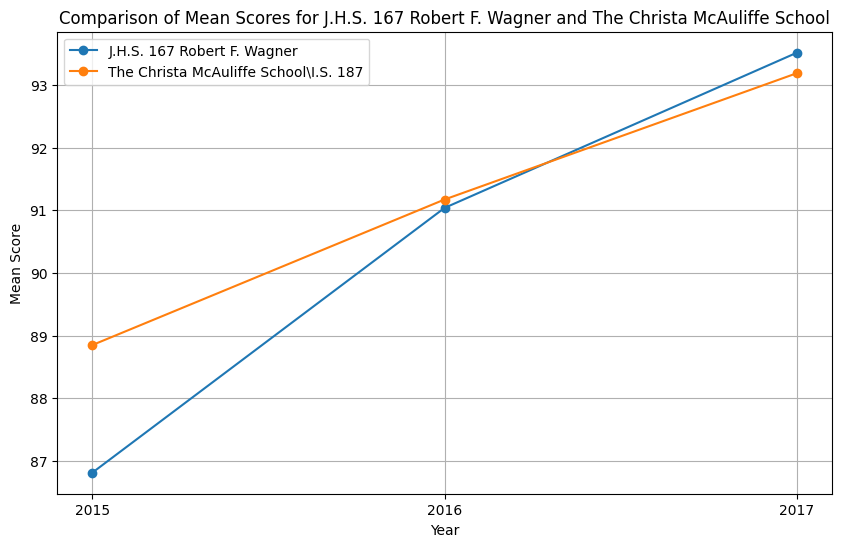

In [45]:
#Comparison of the mean score of students performance for Wagner and McAuliffe School year over year

# Combine the data for both schools into a single DataFrame
schools = ['J.H.S. 167 Robert F. Wagner', 'The Christa McAuliffe School\I.S. 187']
combined_data = cleaned_df[cleaned_df['School Name'].isin(schools) & (cleaned_df['Year'] >= 2015) & (cleaned_df['Year'] <= 2017)]

# Group by school and year to calculate the mean score
school_year_mean = combined_data.groupby(['School Name', 'Year'])['Mean Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
for school in schools:
    school_data = school_year_mean[school_year_mean['School Name'] == school]
    plt.plot(school_data['Year'], school_data['Mean Score'], marker='o', label=school)

plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Comparison of Mean Scores for J.H.S. 167 Robert F. Wagner and The Christa McAuliffe School')
plt.xticks(school_year_mean['Year'].unique())
plt.legend()
plt.grid(True)
plt.show()

Findings: Both schools demonstrate upward trend in students performance;
The McAuliffe School started with higher mean score of ~89 in 2015
compared to Wagner with mean score of ~87.
In 2016 both schools reached similar mean score of ~91.
In 2017 Wagner school surpassed McAuliffe in mean scores reaching above 93, while McAuliffe was slightly lower.

In [50]:
# Extract the mean score for each year

mean_score_by_year = cleaned_df.groupby('Year')['Mean Score'].mean()
mean_score_by_year

,Mean Score
Year,
2015,64.319007
2016,64.316667
2017,66.890157


Overall mean score for the entire school system: 65.02137227031916


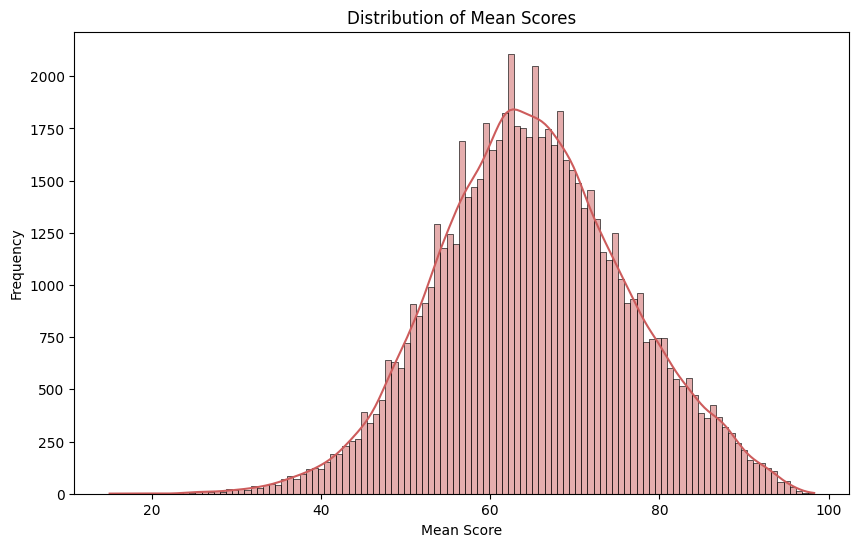

In [63]:
# Calculate the mean of 'Mean Score' for the entire school system and create a plot
overall_mean_score = cleaned_df['Mean Score'].mean()

overall_mean_score = cleaned_df['Mean Score'].mean()

print(f"Overall mean score for the entire school system: {overall_mean_score}")

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Mean Score'], kde=True, color='indianred')
plt.title('Distribution of Mean Scores')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.show()

In [64]:
# Summary statistics for the borough of the manhattan
manhattan_data = cleaned_df[cleaned_df['Borough'] == 'Manhattan']
manhattan_summary = manhattan_data.describe()
manhattan_summary

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,16091.000000,16091.000000,16091.000000,16091.000000,16091.000000,16091.000000,16091.000000,16091.000000,16091.000000
mean,2015.908645,55.773787,67.052613,17.650550,38.521322,17.297433,24.486657,27.397551,41.216251
std,0.804884,71.368792,11.641017,24.100442,29.931855,47.995840,28.215611,56.482378,32.420152
min,2015.000000,6.000000,24.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,16.000000,59.100000,3.000000,11.500000,0.000000,0.000000,3.000000,11.900000
50%,2016.000000,34.000000,66.800000,9.000000,33.300000,4.000000,12.500000,10.000000,36.000000
75%,2017.000000,71.000000,75.400000,22.000000,62.500000,16.000000,40.000000,32.000000,66.700000
max,2017.000000,909.000000,98.300000,310.000000,100.000000,867.000000,100.000000,908.000000,100.000000


Mean of 'Mean Score' for Manhattan: 67.05261326207197


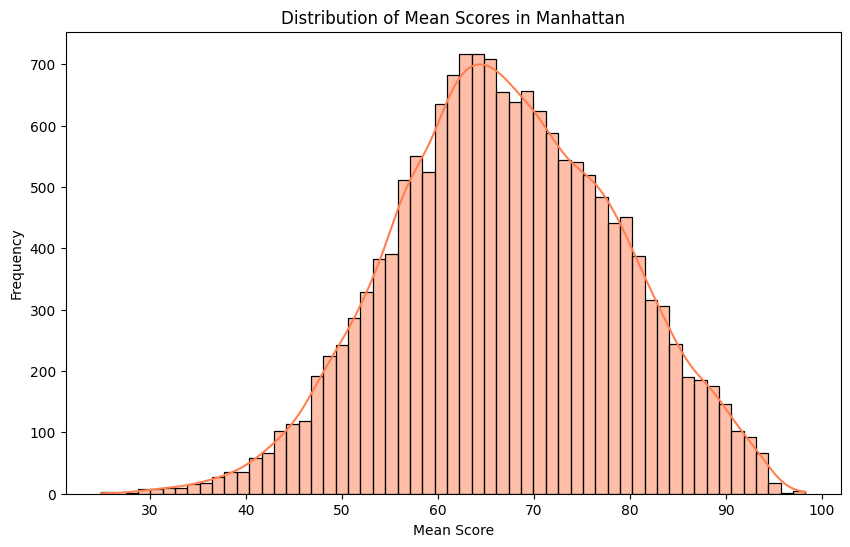

In [65]:
# Mean distribution of the mean score for the manhattan

manhattan_mean_score = manhattan_data['Mean Score'].mean()

print(f"Mean of 'Mean Score' for Manhattan: {manhattan_mean_score}")

plt.figure(figsize=(10, 6))
sns.histplot(manhattan_data['Mean Score'], kde=True, color='coral')
plt.title('Distribution of Mean Scores in Manhattan')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.show()

Mean of 'Mean Score' for Brooklyn: 63.89367230487059


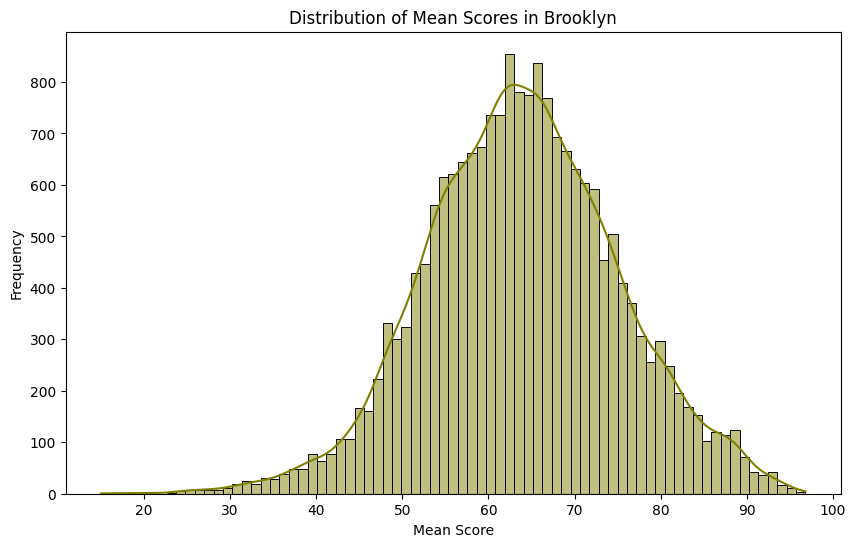

In [68]:
# Mean distribution of the mean score for the Brooklyn


brooklyn_data = cleaned_df[cleaned_df['Borough'] == 'Brooklyn']
brooklyn_mean_score = brooklyn_data['Mean Score'].mean()

print(f"Mean of 'Mean Score' for Brooklyn: {brooklyn_mean_score}")

plt.figure(figsize=(10, 6))
sns.histplot(brooklyn_data['Mean Score'], kde=True, color='olive')
plt.title('Distribution of Mean Scores in Brooklyn')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.show()

In [70]:
# mean score per Regents exam for the Manhattan Borough

manhattan_mean_scores = cleaned_df[cleaned_df['Borough'] == 'Manhattan'].groupby('Regents Exam')['Mean Score'].mean()
manhattan_mean_scores

,Mean Score
Regents Exam,
Algebra2/Trigonometry,58.884774
Common Core Algebra,68.503671
Common Core Algebra2,65.671716
Common Core English,73.777869
Common Core Geometry,61.220804
English,69.170328
Geometry,64.441856
Integrated Algebra,65.725560


In [73]:
# mean score per Regents exam for the Brooklyn Borough

brooklyn_mean_scores = cleaned_df[cleaned_df['Borough'] == 'Brooklyn'].groupby('Regents Exam')['Mean Score'].mean()
brooklyn_mean_scores

,Mean Score
Regents Exam,
Algebra2/Trigonometry,53.866883
Common Core Algebra,66.604891
Common Core Algebra2,62.259172
Common Core English,68.747178
Common Core Geometry,57.337919
English,64.269243
Geometry,60.638385
Integrated Algebra,64.028201


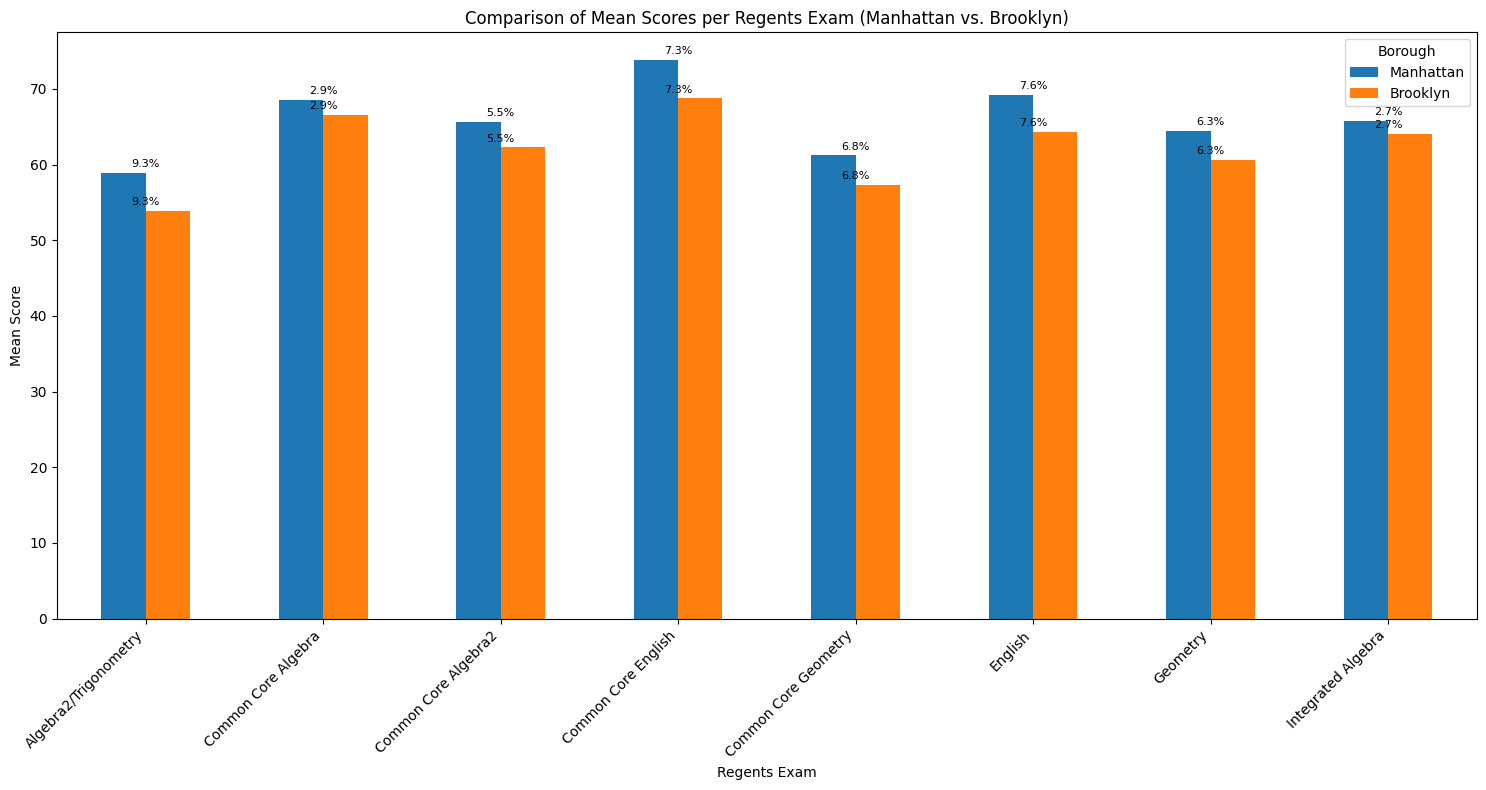

,Manhattan,Brooklyn,Percentage Difference
Regents Exam,,,
Algebra2/Trigonometry,58.884774,53.866883,9.315356
Common Core Algebra,68.503671,66.604891,2.850813
Common Core Algebra2,65.671716,62.259172,5.481191
Common Core English,73.777869,68.747178,7.317669
Common Core Geometry,61.220804,57.337919,6.771933
English,69.170328,64.269243,7.625864
Geometry,64.441856,60.638385,6.272382
Integrated Algebra,65.725560,64.028201,2.650955


In [94]:
# compare mean_scores per regents exam for Brooklyn with Manhattan borough and visualize and including percentage

combined_mean_scores['Percentage Difference'] = ((combined_mean_scores['Manhattan'] - combined_mean_scores['Brooklyn']) / combined_mean_scores['Brooklyn']) * 100
combined_mean_scores.plot(kind='bar', y=['Manhattan', 'Brooklyn'], figsize=(15, 8))
plt.title('Comparison of Mean Scores per Regents Exam (Manhattan vs. Brooklyn)')
plt.xlabel('Regents Exam')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Borough')

for i, (manhattan_score, brooklyn_score, percentage_diff) in enumerate(zip(combined_mean_scores['Manhattan'], combined_mean_scores['Brooklyn'], combined_mean_scores['Percentage Difference'])):
    plt.text(i, manhattan_score + 0.5, f'{percentage_diff:.1f}%', ha='center', va='bottom', fontsize=8)
    plt.text(i, brooklyn_score + 0.5, f'{percentage_diff:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

combined_mean_scores


The analysis of Regents exam scores for Brooklyn and Manhattan boroughs reveals a notable performance disparity.
Manhattan schools consistently outperformed Brooklyn schools across most Regents exams.
This trend is evident in the higher average mean scores observed for Manhattan students compared to their Brooklyn counterparts.
The percentage difference in mean scores further highlights the performance gap, with Manhattan students demonstrating a significant advantage in certain subjects.

While variations in performance exist within specific subjects and individual schools, the overall trend suggests a systemic difference in academic outcomes between the two boroughs.
Further investigation into factors contributing to this disparity, such as school resources, student demographics, and teaching practices, would provide a more comprehensive understanding of the observed differences.